In [1]:
import os
import glob
import datetime

In [2]:
!conda install -y pandas matplotlib tqdm ipywidgets

Solving environment: done

## Package Plan ##

  environment location: /home/seagetch/anaconda3/envs/covid19

  added / updated specs:
    - ipywidgets
    - matplotlib
    - pandas
    - tqdm


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2021.4.13-h06a4308_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.12.5-py39hf~ --> pkgs/main::certifi-2020.12.5-py39h06a4308_0
  openssl            conda-forge::openssl-1.1.1k-h7f98852_0 --> pkgs/main::openssl-1.1.1k-h27cfd23_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
tqdm.pandas()

%matplotlib inline
font = {'family' : 'Noto Sans CJK JP'}
matplotlib.rc('font', **font)

<ipython-input-3-6f1f288f817a>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
if not os.path.exists("data/COVID-19"):
    !cd data && git clone https://github.com/CSSEGISandData/COVID-19.git
else:
    !cd data/COVID-19 && git pull

remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 71 (delta 45), reused 69 (delta 44), pack-reused 0
Unpacking objects: 100% (71/71), 809.77 KiB | 3.52 MiB/s, done.
From https://github.com/CSSEGISandData/COVID-19
   cda86ffa3..2cd0c4093  web-data   -> origin/web-data
Already up to date.


In [5]:
start_date = datetime.date(2020, 3, 22)
end_date = datetime.date.today()
data = {}
for d in tqdm(pd.date_range(start_date, end_date)):
    filename = os.path.join("data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports", d.strftime("%m-%d-%Y.csv"))
    if os.path.exists(filename):
        data[d] = pd.read_csv(filename)

  0%|          | 0/427 [00:00<?, ?it/s]

In [6]:
list(data.values())[-1].columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [7]:
!mkdir -p data
!wget https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/state/totals/nst-est2020.csv -O data/US-population.csv

--2021-05-22 02:08:11--  https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/state/totals/nst-est2020.csv
www2.census.gov (www2.census.gov) をDNSに問いあわせています... 2600:140b:5000:9a3::208c, 2600:140b:5000:9b4::208c, 23.42.32.158
www2.census.gov (www2.census.gov)|2600:140b:5000:9a3::208c|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 7462 (7.3K) [text/csv]
`data/US-population.csv' に保存中

data/US-population. 100%[===================>]   7.29K  --.-KB/s    in 0s      

2021-05-22 02:08:12 (1.41 GB/s) - `data/US-population.csv' へ保存完了 [7462/7462]



In [8]:
populations = pd.read_csv("data/US-population.csv")
populations = populations[["NAME", "POPESTIMATE2020"]]
populations

,NAME,POPESTIMATE2020
0,United States,329484123
1,Northeast Region,55849869
2,Midwest Region,68316744
3,South Region,126662754
4,West Region,78654756
5,Alabama,4921532
6,Alaska,731158
7,Arizona,7421401
8,Arkansas,3030522
9,California,39368078


  0%|          | 0/425 [00:00<?, ?it/s]

,Province_State,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,date,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio
0,Alabama,71489.0,2203.246784,-5809.578199,180,0.0,0.0,0.0,2020-03-22,NaN,NaN,NaN,NaN
1,Alaska,62340.0,1747.579877,-4229.319334,20,0.0,0.0,0.0,2020-03-22,NaN,NaN,NaN,NaN
2,American Samoa,60000.0,-14.271000,-170.132000,0,0.0,0.0,0.0,2020-03-22,NaN,NaN,NaN,NaN
3,Arizona,60208.0,505.138555,-1671.948482,152,2.0,0.0,0.0,2020-03-22,NaN,NaN,NaN,NaN
4,Arkansas,380625.0,2618.391704,-6932.548370,165,0.0,0.0,0.0,2020-03-22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Virginia,6908162.0,4996.297993,-10442.323661,671916,11068.0,0.0,0.0,2021-05-20,NaN,NaN,1.112470e+06,270.581406
54,Washington,2158574.0,1842.117670,-4708.049596,425848,5690.0,0.0,0.0,2021-05-20,NaN,NaN,2.185152e+05,51.237483
55,West Virginia,3063079.0,2134.783954,-4433.959998,159450,2769.0,0.0,0.0,2021-05-20,NaN,NaN,4.755087e+05,92.128896
56,Wisconsin,4055174.0,3196.450332,-6465.454559,671445,7734.0,0.0,0.0,2021-05-20,NaN,NaN,8.117295e+05,94.859104


No population found for American Samoa
No population found for Diamond Princess
No population found for Grand Princess
No population found for Guam
No population found for Northern Mariana Islands
No population found for Recovered
No population found for Virgin Islands
No population found for Wuhan Evacuee


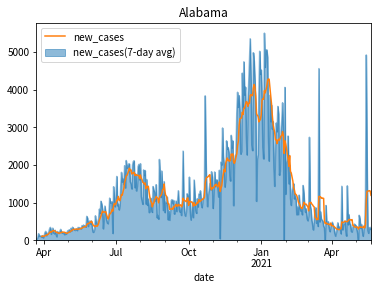

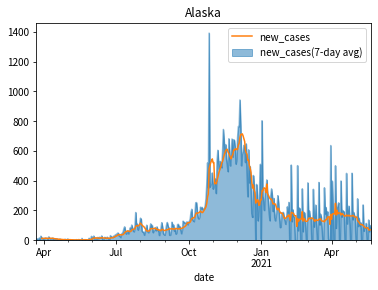

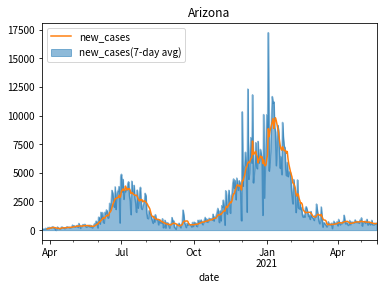

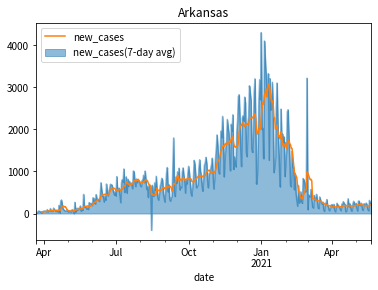

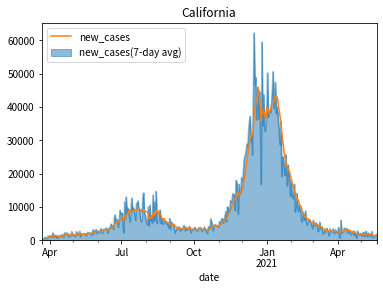

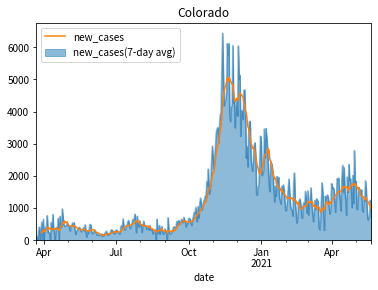

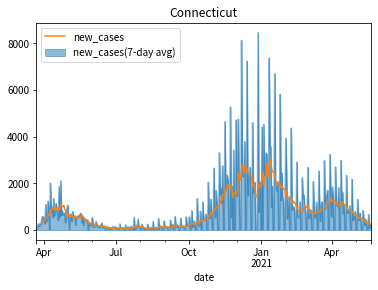

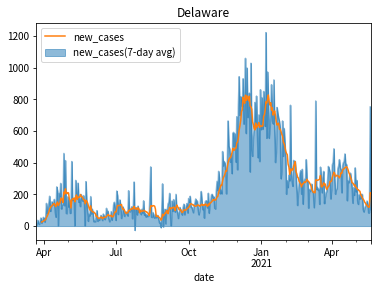

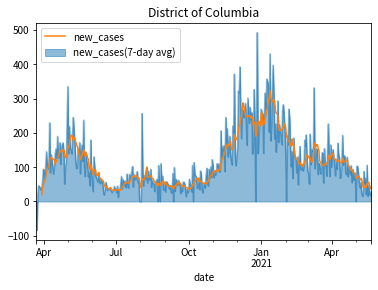

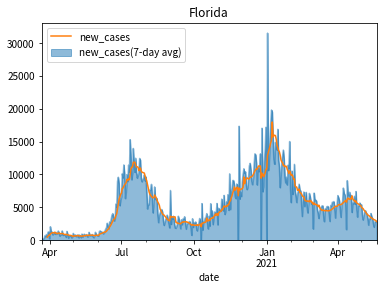

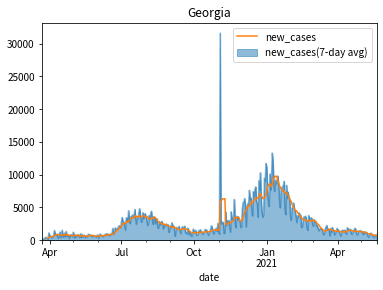

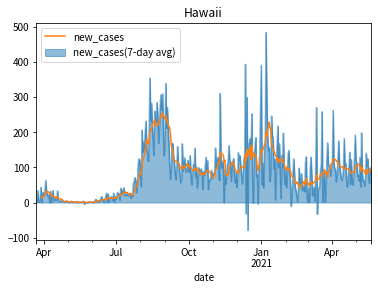

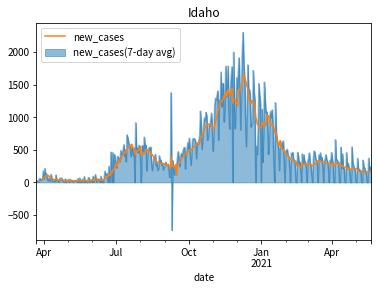

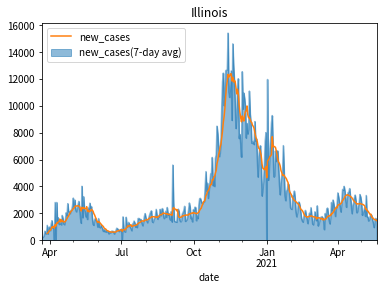

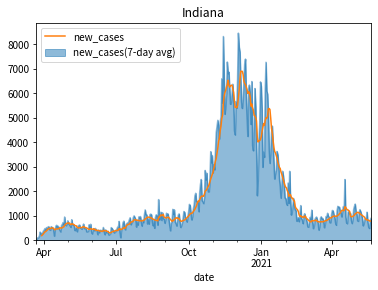

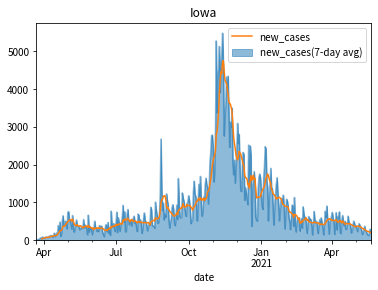

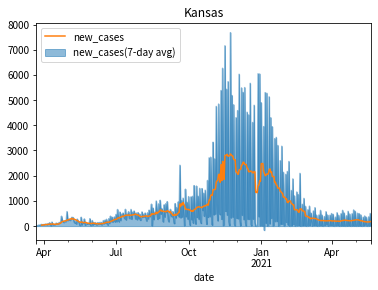

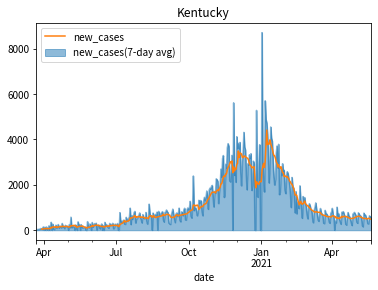

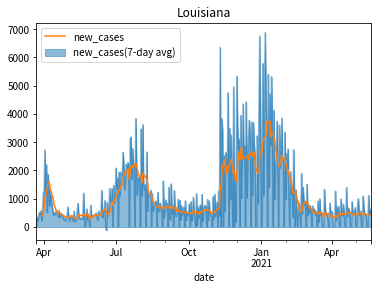

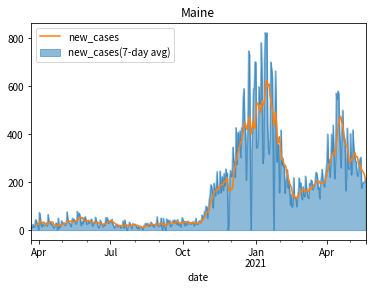

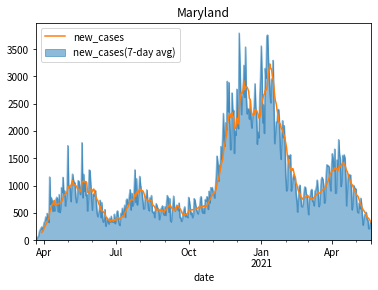

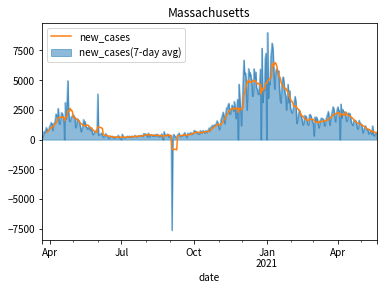

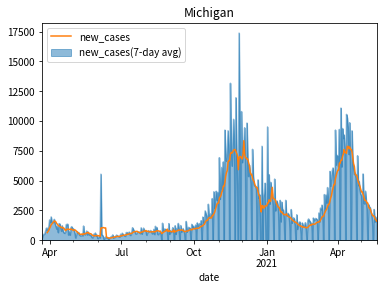

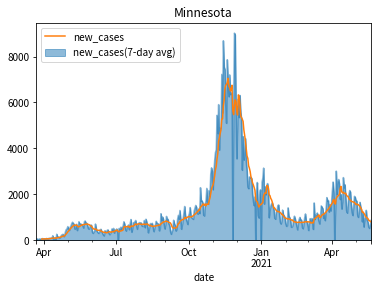

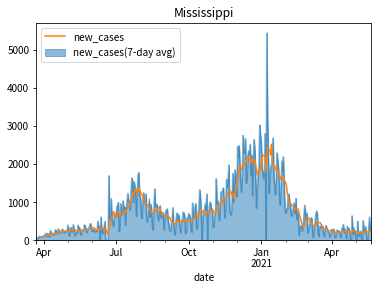

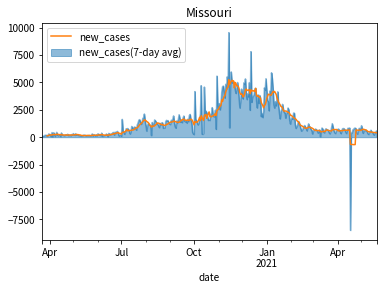

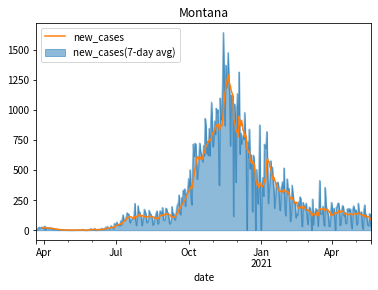

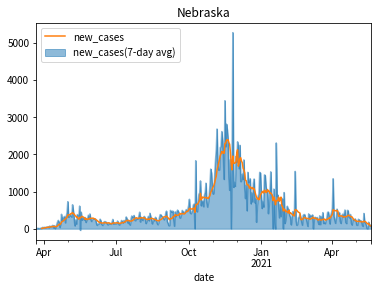

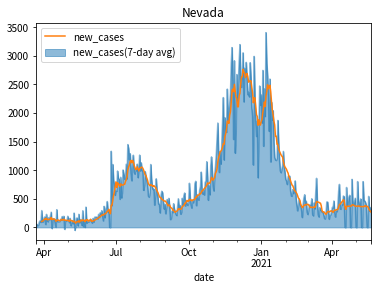

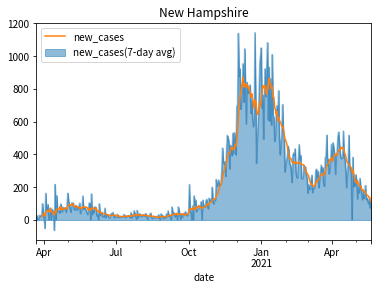

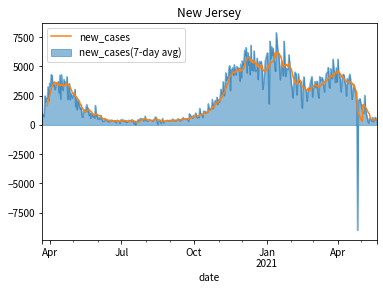

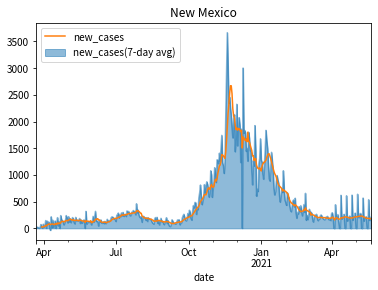

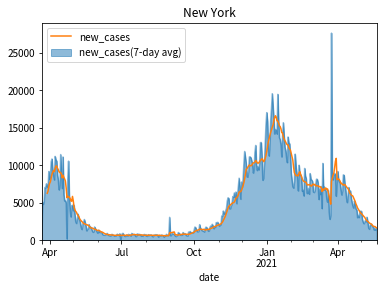

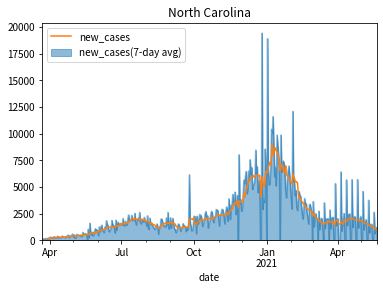

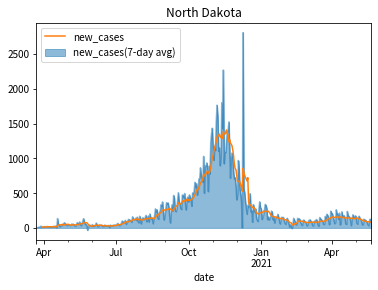

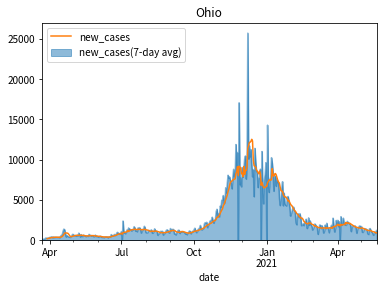

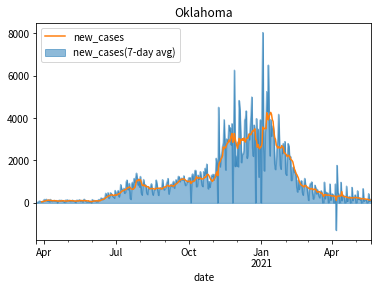

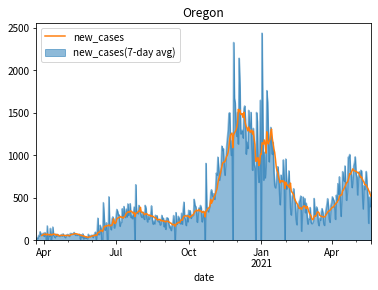

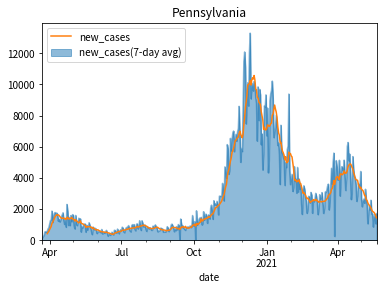

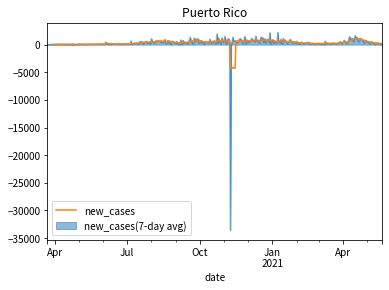

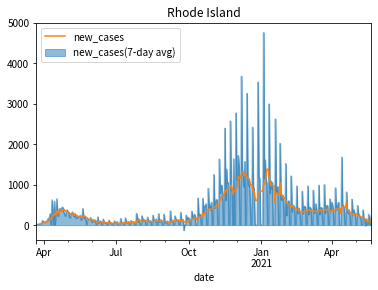

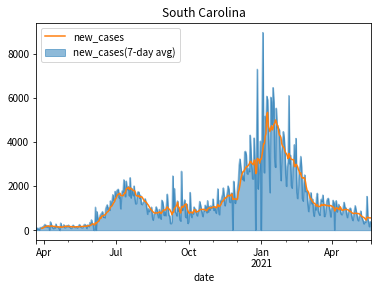

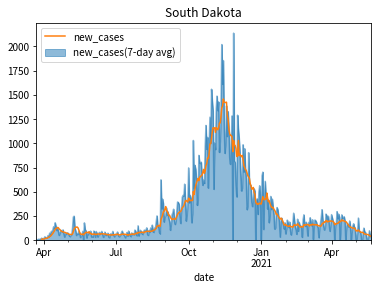

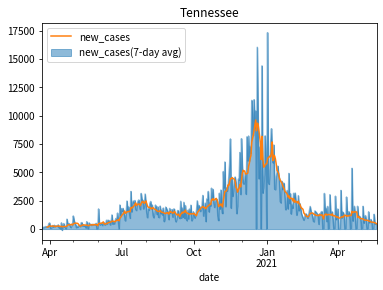

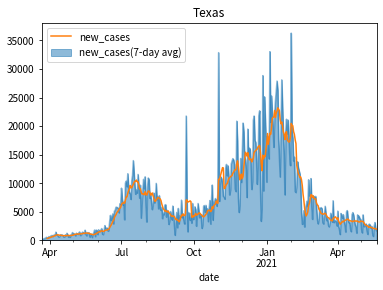

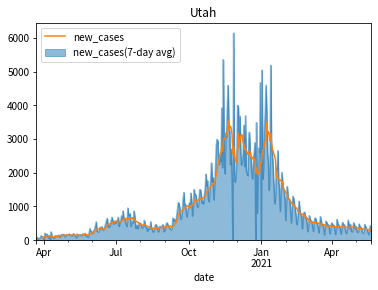

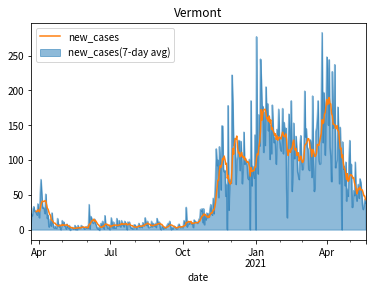

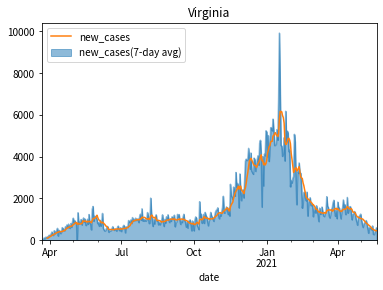

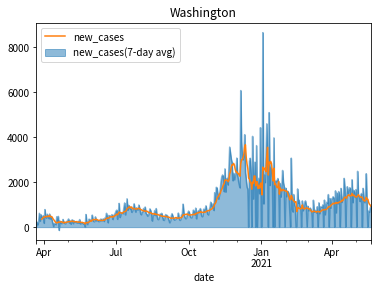

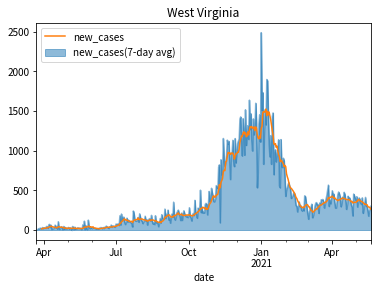

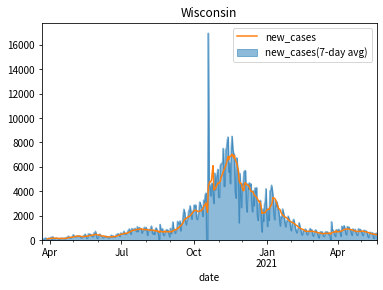

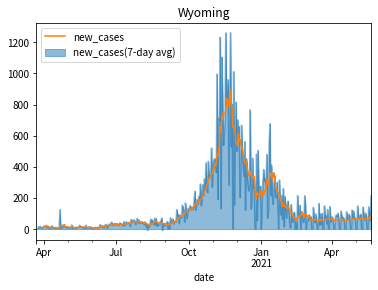

In [9]:
!mkdir -p us_trends/states

def extract_by_country(date, df):
    result = df.loc[df["Country_Region"] == "US"].copy()
    result = result.groupby("Province_State").sum()
    result["date"] = date
    return result.reset_index()
c_data = pd.concat([extract_by_country(date, df) for date, df in tqdm(data.items())])
display(c_data)
state_map = {}
for st, df in c_data.loc[c_data["Province_State"].notnull()].groupby("Province_State"):
    st_pop = populations.loc[populations["NAME"] == st]
    if st_pop.shape[0] >0:
        pop = pd.to_numeric(st_pop["POPESTIMATE2020"].values[0])
        df["new_cases"] = df["Confirmed"].diff()
        df["new_cases(7-day avg)"] = df["new_cases"].rolling(7).mean()
        df.set_index("date", inplace=True)
        df["new_cases_per_million"] = (df["Confirmed"].diff() / pop * 10**6 )
        state_map[st] = df
    else:
        print("No population found for %s"%st)

for st, df in state_map.items():
    ax = df.plot(kind="area", stacked=False, y=["new_cases"], title=st)
    df.plot(ax=ax, kind="line", y=["new_cases(7-day avg)"])
    plt.savefig("us_trends/states/%s.png"%st, facecolor="white")
    plt.show()
    plt.close()


In [12]:
new_cases_label = "new_cases_per_million"
freq = 7

def calc_monthly(df):
    df2=df.reset_index()
#    result = df2.groupby([df2["date"].dt.year, df2["date"].dt.month]).mean()
    result = df2.groupby(pd.Grouper(key="date", freq="%dd"%freq, base=df2.shape[0] % freq )).mean()
    return result

trends = {st: df["new_cases_per_million"] for st, df in state_map.items()}

def calc_trend_map(region, df):
    monthly = calc_monthly(df)
    return (region, 
     monthly[new_cases_label].values[-1])

trend_map = pd.DataFrame([calc_trend_map(region, df) for region, df in trends.items()],
                        columns=["NAME", new_cases_label]).set_index("NAME")

def calc_trends(df):
    monthly = calc_monthly(df)
    diff = monthly.diff()
    return (diff/monthly).fillna(0)

recents = pd.DataFrame([[p] + list(calc_trends(df).iloc[-1]) for p, df in trends.items()], columns=["NAME", "trend_new_cases"])
status = pd.merge(trend_map, recents, on="NAME")
status.set_index("NAME", inplace=True)

<ipython-input-12-275f3f940ffb>:7: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  result = df2.groupby(pd.Grouper(key="date", freq="%dd"%freq, base=df2.shape[0] % freq )).mean()


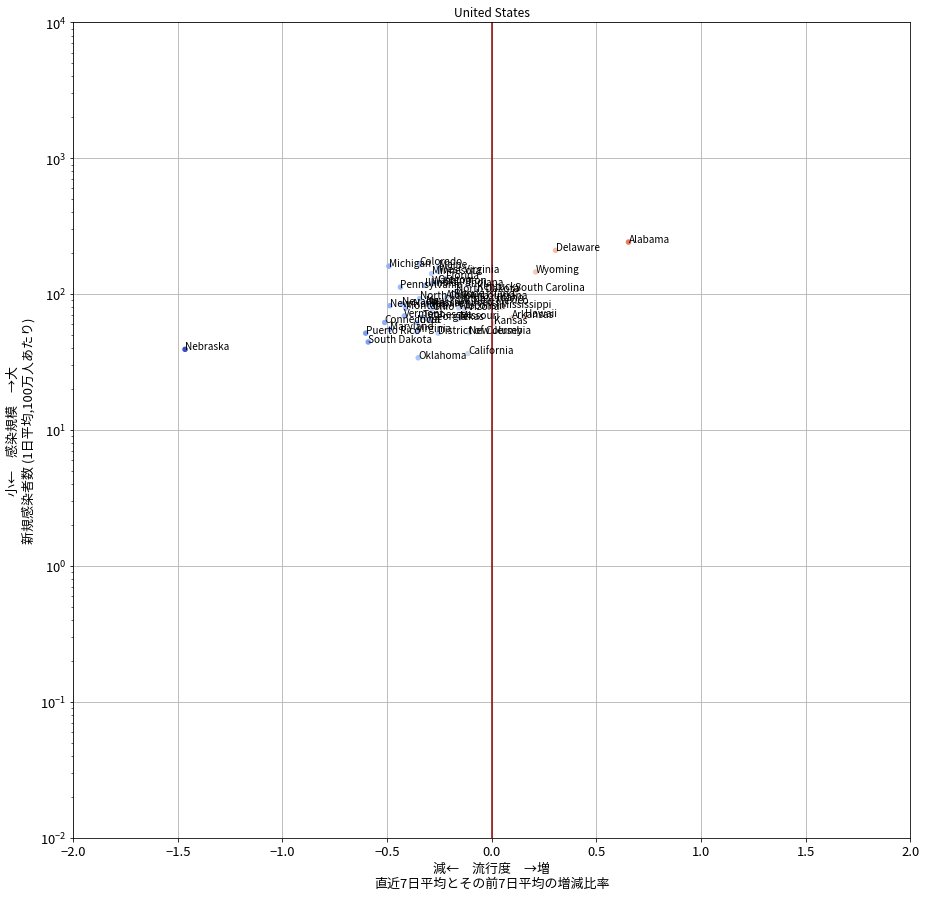

In [13]:
ymin=10**-2
ymax=10**4
xmin=-2
xmax=2

fig,ax=plt.subplots(figsize=(8, 8))

ax = ax
status.plot(ax=ax, kind="scatter", grid=True, 
        x="trend_new_cases", xlim=(xmin,xmax), 
        y=new_cases_label, logy=True, ylim=(ymin, ymax), 
        title="United States",
        fontsize=13,
        legend=False,
        colorbar=False,
        c="trend_new_cases", colormap="coolwarm", vmin=-1, vmax=1, 
        figsize=(15,15))
ax.set_ylabel("小←　感染規模　→大\n新規感染者数 (1日平均,100万人あたり)", fontsize=13)
ax.set_xlabel("減←　流行度　→増\n直近{freq}日平均とその前{freq}日平均の増減比率".format(freq=freq), fontsize=13)
ax.vlines(0, ymin, ymax, linestyles="solid", color="darkred")
for i,r in status.iterrows():
    x = r["trend_new_cases"]
    y = r[new_cases_label]
    region = r.name
    if xmin <= x and x < xmax and ymin <= y and y < ymax:
        color = "black"
        fontweight = "normal"
        ax.annotate(region, xy=(x, y), color=color, fontweight = fontweight)
        
display(fig)
plt.savefig("us_trends/trend-us.png", facecolor="white")
plt.close()